# Оценка A/B-теста
* корректность проведения
  - пересечение тестовой аудитории с конкурирующим тестом
  - совпадение теста и маркетинговых событий, другие проблемы временных границ теста
* результат

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Конкурирующий-тест" data-toc-modified-id="Конкурирующий-тест-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Конкурирующий тест</a></span></li><li><span><a href="#Одновременные-мероприятия" data-toc-modified-id="Одновременные-мероприятия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Одновременные мероприятия</a></span></li><li><span><a href="#География-аудитории" data-toc-modified-id="География-аудитории-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>География аудитории</a></span></li><li><span><a href="#Распределение-по-группам" data-toc-modified-id="Распределение-по-группам-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Распределение по группам</a></span><ul class="toc-item"><li><span><a href="#Состав-групп" data-toc-modified-id="Состав-групп-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Состав групп</a></span></li><li><span><a href="#Распеделение-количества-событий" data-toc-modified-id="Распеделение-количества-событий-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Распеделение количества событий</a></span></li></ul></li></ul></li><li><span><a href="#Оценка-результата-A/B-тестрирования" data-toc-modified-id="Оценка-результата-A/B-тестрирования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка результата A/B-тестрирования</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math as mth
import matplotlib.pyplot as plt
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

from plotly.subplots import make_subplots
from plotly import graph_objects as go
from scipy import stats as st
from pandas.api.types import CategoricalDtype

In [2]:
calendar = pd.read_csv('/datasets/ab_project_marketing_events.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
new_users_events = pd.read_csv('/datasets/final_ab_events.csv')
participants = pd.read_csv('/datasets/final_ab_participants.csv')

## Изучение данных

In [3]:
for df, name in zip([calendar, new_users, new_users_events, participants]
                    ,['calendar', 'new_users', 'new_users_events', 'participants']):
    print(name, '\n')
    df.info() 
    print('\nКоличество повторяющихся строк в', name, '—', df.duplicated().sum())
    display(df.head())
    print('_________________________________________________________________________________________________________\n')

calendar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     int64 
 1   name        14 non-null     object
 2   regions     14 non-null     object
 3   start_dt    14 non-null     object
 4   finish_dt   14 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes

Количество повторяющихся строк в calendar — 0


,Unnamed: 0,name,regions,start_dt,finish_dt
0,0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4,4th of July Promo,N.America,2020-07-04,2020-07-11


_________________________________________________________________________________________________________

new_users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61733 non-null  int64 
 1   user_id     61733 non-null  object
 2   first_date  61733 non-null  object
 3   region      61733 non-null  object
 4   device      61733 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB

Количество повторяющихся строк в new_users — 0


,Unnamed: 0,user_id,first_date,region,device
0,0,D72A72121175D8BE,2020-12-07,EU,PC
1,1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,3,50734A22C0C63768,2020-12-07,EU,iPhone
4,4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


_________________________________________________________________________________________________________

new_users_events 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  440317 non-null  int64  
 1   user_id     440317 non-null  object 
 2   event_dt    440317 non-null  object 
 3   event_name  440317 non-null  object 
 4   details     62740 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.8+ MB

Количество повторяющихся строк в new_users_events — 0


,Unnamed: 0,user_id,event_dt,event_name,details
0,0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


_________________________________________________________________________________________________________

participants 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18268 non-null  int64 
 1   user_id     18268 non-null  object
 2   group       18268 non-null  object
 3   ab_test     18268 non-null  object
dtypes: int64(1), object(3)
memory usage: 571.0+ KB

Количество повторяющихся строк в participants — 0


,Unnamed: 0,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,2,DABC14FDDFADD29E,A,recommender_system_test
3,3,04988C5DF189632E,A,recommender_system_test
4,4,482F14783456D21B,B,recommender_system_test


_________________________________________________________________________________________________________



<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>обнаружены пропуски в поле <b>details</b> таблицы <b>new_users_events</b></li>
<li>дубликатов не обнаружено</li>
<li>привести поля с датами к формату <b>datetime</b></li>
</div>

## Предобработка данных

In [4]:
for df, name in zip([calendar, new_users, new_users_events, participants]
                    ,['calendar', 'new_users', 'new_users_events', 'participants']):
    selected_columns = df.filter(like='dt').columns | df.filter(like='date').columns
    for column in selected_columns:
        df[column] = pd.to_datetime(df[column])
        print(name,'—', column,'—', df[column].dtype)

calendar — start_dt — datetime64[ns]
calendar — finish_dt — datetime64[ns]
new_users — first_date — datetime64[ns]
new_users_events — event_dt — datetime64[ns]


In [5]:
new_users_events[new_users_events['details'].isna()==True]['event_name'].value_counts()

login           189552
product_page    125563
product_cart     62462
Name: event_name, dtype: int64

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>поля с датами приведены к формату <b>datetime</b></li>
<li>пропуски в поле <b>details</b> таблицы <b>new_users_events</b> относятся к не к покупкам, а к событиям, у которых нет стоимости, поэтому заполнять их не нужно.</li>
</div>

## Исследовательский анализ данных

### Конкурирующий тест

In [6]:
participants_rst = participants.query('ab_test == "recommender_system_test"')

In [7]:
participants_eu = participants.query('ab_test != "recommender_system_test"')

In [8]:
participants_tests = \
participants_rst[['user_id', 'group']].merge(participants_eu[['user_id', 'group']]
                                             , on='user_id', how='outer', suffixes=('_rst', '_eu'))

In [9]:
double_test_users = \
participants_tests[(participants_tests['group_rst'].isna()==False)&\
                    (participants_tests['group_eu'].isna()==False)]['user_id'].to_list()

In [10]:
len(double_test_users)

1602

In [11]:
participants_eu[participants_eu['user_id'].isin(double_test_users)]['group'].value_counts()

A    819
B    783
Name: group, dtype: int64

In [12]:
double_test_users_b = participants_eu[(participants_eu['user_id'].isin(double_test_users))&(participants_eu['group']=="B")]

In [13]:
participants_rst_filtered = \
participants_rst[~(participants_rst['user_id'].isin(double_test_users_b))]

In [14]:
len(participants_rst_filtered)

6701

<div style="border-radius: 15px; border: 3px solid red; padding: 15px;">
<b>Вывод</b><br>
1602 пользователя участвовали в обоих тестах — <b>recommender_system_test</b> и <b>interface_eu_test</b>.<br>819 из них оказались в контрольной группе теста <b>interface_eu_test</b>.<br> А остальных лучше исключить из рассмотрения для корректного анализа результатов теста <b>recommender_system_test</b>.
</div>

### Одновременные мероприятия

In [15]:
calendar.query('finish_dt >= "2020-12-07"')

,Unnamed: 0,name,regions,start_dt,finish_dt
0,0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


In [16]:
new_users_events_filtered = \
new_users_events[~((new_users_events['event_dt'] >= '2020-12-25')&(new_users_events['event_dt'] <= '2021-01-03'))]

<div style="border-radius: 15px; border: 3px solid red; padding: 15px;">
<b>Вывод</b><br>
Одновременно с тестом для пользователей из ЕС (аудитория теста) проходила акция <b>Christmas&New Year Promo</b>.<br> Для корректного анализа результатов теста <b>recommender_system_test</b> события, случившиеся во время акции, следует исключить из рассмотрения.
</div>

### География аудитории

In [17]:
new_users_eu = new_users.query('region=="EU" and first_date >="2020-12-07" and first_date <="2020-12-21"')['user_id'].to_list()

In [18]:
len(new_users_eu)

42340

In [19]:
new_users_events_filtered_2 = \
new_users_events_filtered[new_users_events_filtered['user_id'].isin(new_users_eu)]

In [20]:
len(new_users_events_filtered_2)

263547

In [21]:
participants_rst_filtered_2 = \
participants_rst_filtered[participants_rst_filtered['user_id'].isin(new_users_eu)]

In [22]:
len(participants_rst_filtered_2)

6351

In [23]:
round(len(participants_rst_filtered_2)/len(new_users_eu)*100,2)

15.0

<div style="border-radius: 15px; border: 3px solid red; padding: 15px;">
<b>Вывод</b><br>
Аудиторией теста <b>recommender_system_test</b> являются новые пользователи из ЕС. 
Следовательно, из рассмотрения нужно исключить пользователей из других регионов. А также пользователей, зарегистрировавшихся не в период с 7-го по 21-е декабря 2020.
</div>

### Распределение по группам

#### Состав групп

In [24]:
participants_rst_groups = \
participants_rst_filtered_2 [['user_id', 'group']].query('group=="A"')\
.merge(participants_rst_filtered_2 [['user_id', 'group']].query('group=="B"')
                                             , on='user_id', how='outer', suffixes=('_a', '_b'))

In [25]:
len(participants_rst_groups[(participants_rst_groups['group_a'].isna()==False)\
                        &(participants_rst_groups['group_b'].isna()==False)])

0

In [26]:
len(participants_rst_groups[participants_rst_groups['group_a'].isna()==False])

3634

In [27]:
len(participants_rst_groups[participants_rst_groups['group_b'].isna()==False])

2717

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<b>Вывод</b><br>
Группы A и B участников теста <b>recommender_system_test</b> не пересекаются.
</div>

#### Распеделение количества событий

In [28]:
data = new_users_events_filtered_2.merge(participants_rst_filtered_2, on='user_id', how='inner')
data['event_date'] = data['event_dt'].astype('datetime64[D]')

In [29]:
data_agg = data.groupby(['group', 'event_date']).agg(events_cnt=('event_dt','nunique')
                                                     , users_cnt=('user_id','nunique')).reset_index()
data_agg['events_per_user'] = round(data_agg['events_cnt']/data_agg['users_cnt'],2)

In [30]:
# Построение графиков
def draw_chart(data, marker=None, data_y=None, data_x=None, column_diff=None, title=None, xlabel=None, ylabel = None):
    # Двойные
    if column_diff is not None:
        data_1 = data[data[column_diff] == data[column_diff].unique()[0]]
        data_2 = data[data[column_diff] == data[column_diff].unique()[1]]
        plt.rcParams['figure.figsize'] = (10, 5)
        plt.rcParams['legend.loc']='upper right'
        fig = (plt.plot(data_1[data_x], data_1[data_y], label=data_1[column_diff].unique().item(), marker=marker),
        plt.plot(data_2[data_x], data_2[data_y], label=data_2[column_diff].unique().item(), marker=marker))
    else: 
        fig = data.plot(x=data_x, y=data_y, figsize = (10,5), legend=False, kind = kind, marker=marker)
    plt.legend()
    plt.xlabel('%s'%(xlabel), fontsize=14)
    plt.ylabel('%s'%(ylabel), fontsize=14)
    plt.gcf().autofmt_xdate()
    plt.grid()
    plt.title(title, fontsize=16)
    return fig

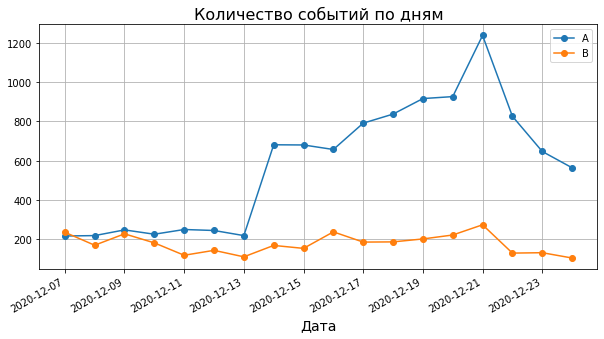

In [31]:
draw_chart(data = data_agg
           , marker='o', column_diff='group', data_x ='event_date', data_y='events_cnt'
           , title = 'Количество событий по дням', xlabel='Дата', ylabel='');

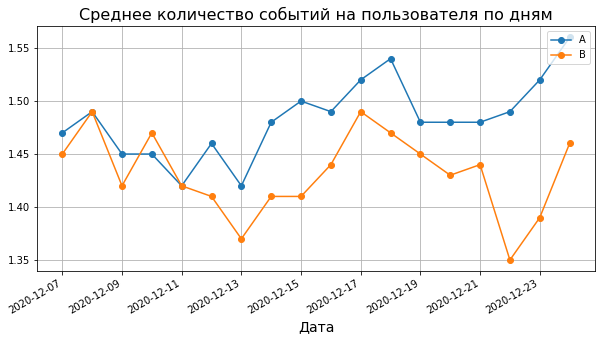

In [32]:
draw_chart(data = data_agg
           , marker='o', column_diff='group', data_x ='event_date', data_y='events_per_user'
           , title = 'Среднее количество событий на пользователя по дням', xlabel='Дата', ylabel='');

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<b>Вывод</b><br>
<li>в группе А после 13-го декабря 2020 значительно больше событий на день, чем в группе B</li>
<li>в группе А после 10-го декабря 2020 стабильно больше событий на пользователя в день, чем в группе B</li>
</div>

In [33]:
groups_all = data.groupby('group').agg(users_cnt=('user_id','nunique')).reset_index()
groups_all

,group,users_cnt
0,A,2604
1,B,877


<div style="border-radius: 15px; border: 3px solid orange; padding: 15px;">
<b>Вывод</b><br>
Похоже, в почищенной таблице событий (<b>new_users_events_filtered_2</b>) не оказалось событий, связанных со многими пользователями из очищенной таблицы участников (<b>participants_rst_filtered_2</b>).<br>
Т.е. многие пользователи (преимущественно из группы B) зарегистрировались, но ничего не делали на сайте во время теста. Либо их действия совпали по времени с новогодней акцией и были искоючены из рассмотрения.
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод общий</b><br><br>
Тест <b>recommender_system_test</b> проведён некорректно, т.к.:
<li>некоторые участники теста участвовали ещё и в тесте <b>interface_eu_test</b></li>
<li>одновременно с тестом для его аудитории проходила акция <b>Christmas&New Year Promo</b></li><br>
Участники теста распределены по группам корректно, т.к.:
<li>группы не пересекаются по составу</li>
<li>в начале теста количество событий на день и среднее количество событий в день на пользователя в группах примерно совпадают</li>
</div>

## Оценка результата A/B-тестрирования

In [34]:
data = data.merge(new_users[['user_id', 'first_date']], on='user_id', how='left')

In [35]:
data_filtered = data[(data['event_date'] - data['first_date']) <= dt.timedelta(days=14)]

In [36]:
def count_data_stat(data):
    data_stat = data.agg({'event_name':'count', 'user_id':'nunique'}).\
                                           rename(index={'event_name':'events_cnt', 'user_id':'users_cnt'}).to_frame().T
    data_stat['min_date'] = data['event_date'].min()
    data_stat['max_date'] = data['event_date'].max()
    data_stat['period'] = data_stat['max_date']  - data_stat['min_date']
    data_stat['mean_events_per_user'] = (data_stat['events_cnt']/data_stat['users_cnt']).round(2)   
    return data_stat

In [37]:
data_stat = count_data_stat(data_filtered)
data_stat

,events_cnt,users_cnt,min_date,max_date,period,mean_events_per_user
0,20031,3481,2020-12-07 00:05:57,2020-12-24 23:58:32,17 days 23:52:35,5.75


In [38]:
event_name_order = CategoricalDtype(['login', 'product_page', 'product_cart', 'purchase'], ordered=True)

In [39]:
def count_funnel(data):
    funnel = data.groupby('event_name').agg(users_cnt=('user_id','nunique')).reset_index().reset_index(drop=True)
    funnel['event_name'] = funnel['event_name'].astype(event_name_order)
    funnel = funnel.sort_values(by='event_name').reset_index(drop=True)
    funnel['users_pct'] = round(funnel['users_cnt']/(data_stat['users_cnt'][0])*100,2)
    funnel['users_prev_pct'] = np.nan
    for i in range(len(funnel))[1:]:    
        funnel['users_prev_pct'][i] = round(funnel['users_cnt'][i]*100/funnel['users_cnt'][i-1],2)
    return funnel

In [40]:
funnel_a = count_funnel(data_filtered.query('group =="A"'))
funnel_a

,event_name,users_cnt,users_pct,users_prev_pct
0,login,2604,74.81,NaN
1,product_page,1685,48.41,64.71
2,product_cart,782,22.46,46.41
3,purchase,833,23.93,106.52


In [41]:
funnel_b = count_funnel(data_filtered.query('group =="B"'))
funnel_b

,event_name,users_cnt,users_pct,users_prev_pct
0,login,876,25.17,NaN
1,product_page,493,14.16,56.28
2,product_cart,244,7.01,49.49
3,purchase,249,7.15,102.05


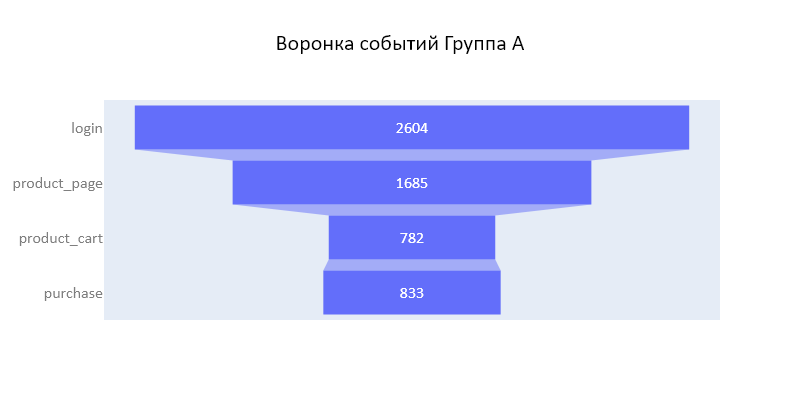

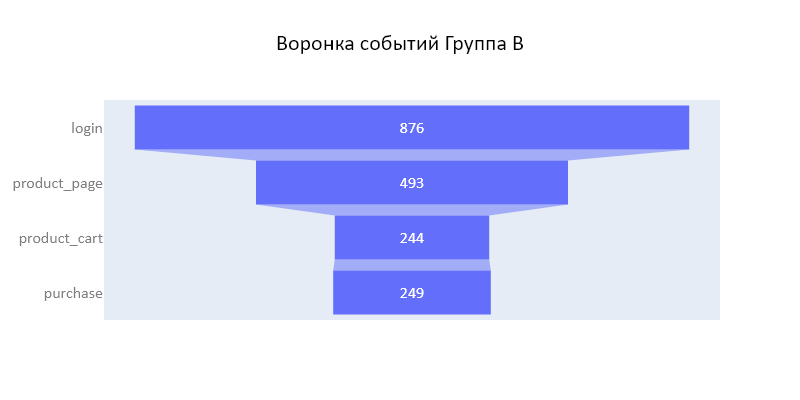

In [42]:
for funnel, group in zip([funnel_a, funnel_b], ['Группа А', 'Группа B']):
    fig_1 = go.Figure(
        go.Funnel(
            y=funnel[funnel['event_name']!='Tutorial']['event_name'],
            x=funnel['users_cnt']
        )
    )
    fig_1.update_layout(
            title='Воронка событий %s'%(group), title_x=0.5, title_font_color = 'black',
            width=800,
            height=400,
            font=dict(family='Calibri, monospace', size=16, color='#7f7f7f'))
    fig_1.show('png') 

<div style="border-radius: 15px; border: 3px solid orange; padding: 15px;">
<b>Вывод</b><br>
Почему-то в обеих группах покупок (<b>purchase</b>) больше, чем просмотров корзин (<b>product_cart</b>).<br> Возможно, на сайте реально сделать покупку, не заходя в корзину.
Порядок событий пришлось задать вручную.
</div>

**Гипотезы**
* H0 — Конверсия групп А и В на шаге **i** НЕ различается
* Н1 — Конверсия групп А и В на шаге **i** различается

In [43]:
def compare_funnels(data_1, data_2, column, len_1, len_2):
    alpha = 1-(1-0.05)**(1/12)
    distr = st.norm(0, 1)
    i = 0
    while i < len(data_1):
        p1 = data_1[column][i] / len_1
        p2 = data_2[column][i] / len_2
        diff = p1 - p2
        p_combined = (data_1[column][i] + data_2[column][i]) / (len_1 + len_2)
        z = diff / mth.sqrt(p_combined*(1 - p_combined)*(1/len_1 + 1/len_2))
        p_value = (1 - distr.cdf(abs(z))) * 2
        if p_value < alpha:
            print('Шаг {} — p-value = {} — между конверсиями есть значимая разница'.format(i, p_value))
        else:
            print('Шаг {} — p-value = {} — нет оснований считать конверсии разными'.format(i, p_value))  
        i = i+1

In [44]:
compare_funnels(funnel_a, funnel_b, 'users_cnt', groups_all['users_cnt'][0],groups_all['users_cnt'][1])

Шаг 0 — p-value = 0.08481837035887363 — нет оснований считать конверсии разными
Шаг 1 — p-value = 6.942739359416805e-06 — между конверсиями есть значимая разница
Шаг 2 — p-value = 0.21469192029582396 — нет оснований считать конверсии разными
Шаг 3 — p-value = 0.04652482738393027 — нет оснований считать конверсии разными


## Общий вывод

**Ожидания**:

За 14 дней с момента регистрации в системе (т.е. с 21-го декабря 2020) пользователи покажут улучшение каждой метрики не менее, чем на 10%:
* конверсии в просмотр карточек товаров — событие **product_page**
* просмотры корзины — **product_cart**
* покупки — **purchase**.

**Реальность**:
* конверсия в просмотр карточек товаров упала на 8% (64% в группе **А** и 56% в группе **B**, судя по воронкам)
* конверсия в просмотры корзины не выросла
* конверсия в покупки не выросла.

**Замечания**:
* при выборе периода проведения теста не учтены маркетинговые акции
* при отборе участников для теста не учтено задействование некоторых из них в конкурирующем тесте.